# Diabets predict using K-neighbors classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(767, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.847458,120.934811,69.106910,20.508475,79.903520,31.984485,0.471836,33.249022,0.348110
std,3.371117,31.973976,19.368396,15.943753,115.283105,7.886112,0.331543,11.765742,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.469160
BMI                         0.291765
Age                         0.239637
Pregnancies                 0.223189
DiabetesPedigreeFunction    0.173889
Insulin                     0.131984
SkinThickness               0.072528
BloodPressure               0.065250
dtype: float64

In [6]:
df.loc[df['BMI'] < 18.5, 'BMI_cat'] = 0
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] < 25), 'BMI_cat'] = 1
df.loc[(df['BMI'] >= 25) & (df['BMI'] < 30), 'BMI_cat'] = 2
df.loc[df['BMI'] >= 30, 'BMI_cat'] = 3 

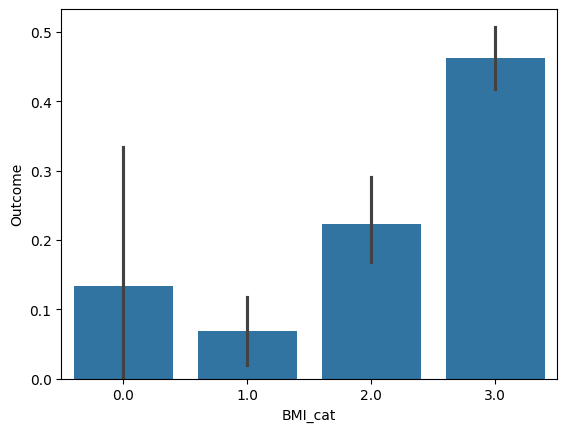

In [7]:
sns.barplot(x=df['BMI_cat'], y=df['Outcome'])
plt.show()

In [8]:
df.loc[df['Age'] < 30, 'Age_cat'] = 0
df.loc[(df['Age'] >= 30) & (df['Age'] < 50), 'Age_cat'] = 1
df.loc[(df['Age'] >= 50) & (df['Age'] < 70), 'Age_cat'] = 2
df.loc[df['Age'] >= 70, 'Age_cat'] = 3

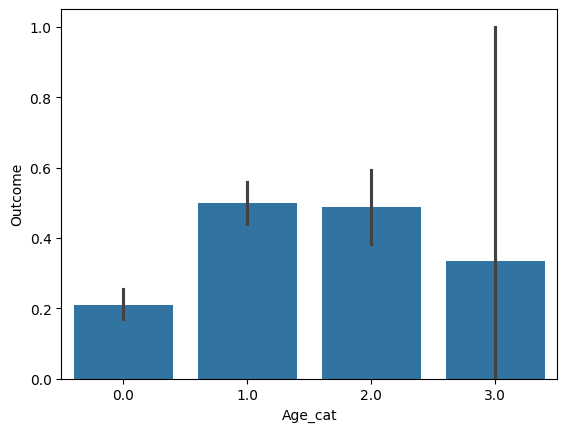

In [9]:
sns.barplot(x=df['Age_cat'], y=df['Outcome'])
plt.show()

In [10]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.469160
BMI_cat                     0.306869
BMI                         0.291765
Age_cat                     0.260795
Age                         0.239637
Pregnancies                 0.223189
DiabetesPedigreeFunction    0.173889
Insulin                     0.131984
SkinThickness               0.072528
BloodPressure               0.065250
dtype: float64

In [11]:
X = df[['Glucose', 'BMI_cat', 'Age_cat', 'Pregnancies', 'DiabetesPedigreeFunction']].values
y = df['Outcome']

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}
knn = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [15]:
knn.n_neighbors = knn_gscv.best_params_['n_neighbors']
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [16]:
y_predict = knn.predict(X_test)

In [17]:
from sklearn.metrics import jaccard_score

j_score = jaccard_score(y_test, y_predict)
j_score

0.46153846153846156

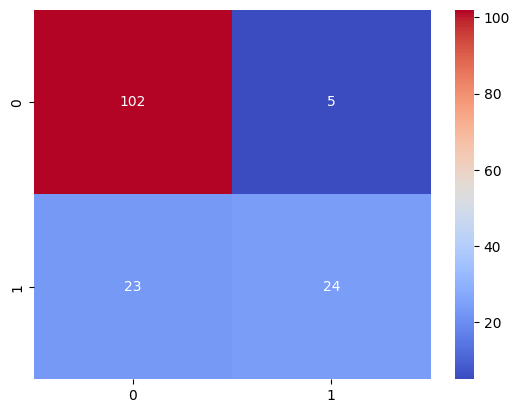

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='.0f', cmap='coolwarm')
plt.show()

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.8275862068965517
recall=0.5106382978723404
f1=0.631578947368421
accuracy=0.8181818181818182


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       107
           1       0.83      0.51      0.63        47

    accuracy                           0.82       154
   macro avg       0.82      0.73      0.76       154
weighted avg       0.82      0.82      0.80       154

